<a href="https://colab.research.google.com/github/pierreduke/Rice_Leaf_Disease-DIP-ET4591-20202/blob/main/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/Rice.zip

**1) Khai báo thư viện**

In [ ]:
#Khai bao thu vien
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.layers.core import Dropout
from imutils import paths
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from google.colab.patches import cv2_imshow
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import os

**2) Khởi tạo model**

*2.1) DenseNet*

In [ ]:
#Model_DenseNet121
from tensorflow.keras.applications import DenseNet121
baseModel = DenseNet121(weights="imagenet", include_top=False, input_tensor=Input(shape=(64, 64, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(2,2))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(1024, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(1024, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
print(model.summary())

29089792/29084464 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 32, 32, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1/conv[0][0]                 
_____________________________

*2.2) VGG16*

In [ ]:
#Model VGG16
# from tensorflow.keras.applications import VGG16
# baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(64, 64, 3)))
# headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(2,2))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(3, activation="softmax")(headModel)
# model = Model(inputs=baseModel.input, outputs=headModel)
# print(model.summary())

*2.3) MobileNet*

In [ ]:
# #Model MobileNet
# from tensorflow.keras.applications import MobileNet
# baseModel = MobileNet(weights="imagenet", include_top=False, input_tensor=Input(shape=(64, 64, 3)))
# headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(2,2))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(3, activation="softmax")(headModel)
# model = Model(inputs=baseModel.input, outputs=headModel)
# print(model.summary())

*2.4) InceptionV3*

In [ ]:
# #Model Inception
# from tensorflow.keras.applications import InceptionV3
# baseModel = InceptionV3(weights="imagenet", include_top=False, input_tensor=Input(shape=(76, 76, 3)))
# headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(1,1))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(3, activation="softmax")(headModel)
# model = Model(inputs=baseModel.input, outputs=headModel)
# print(model.summary())

**3) Thiết lập LR, Batch_size, Epochs**

In [ ]:
#thiet lap thong so lr, batch_size va epochs
INIT_LR = 1e-4
BS = 8
EPOCHS = 20

**4) Khởi tạo ảnh đầu vào**

In [ ]:
#khoi tao input
imagePaths = list(paths.list_images('/content/Rot_Img/train'))
data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (64, 64))
    # cv2_imshow(image)
    data.append(image)
    labels.append(label)
data = np.array(data, dtype="float") / 255.0

**5) Mã hoá one-hot nhãn**

In [ ]:
#one-hot label
le = LabelEncoder()
labels = le.fit_transform(labels)
labels = np_utils.to_categorical(labels, 3)

**6) Thiết lập dữ liệu train**

In [ ]:
#set du lieu train
X_train = data
y_train = labels

**7) Compile và train model**

In [ ]:
#compile + train
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(X_train, y_train, batch_size=BS, steps_per_epoch=len(X_train) // BS, epochs=EPOCHS)

Epoch 1/20
313/313 [==============================] - 57s 49ms/step - loss: 0.6575 - accuracy: 0.7268
Epoch 2/20
313/313 [==============================] - 17s 48ms/step - loss: 0.3710 - accuracy: 0.8606
Epoch 3/20
313/313 [==============================] - 15s 48ms/step - loss: 0.2590 - accuracy: 0.9041
Epoch 4/20
313/313 [==============================] - 15s 48ms/step - loss: 0.1918 - accuracy: 0.9289
Epoch 5/20
313/313 [==============================] - 15s 47ms/step - loss: 0.1813 - accuracy: 0.9329
Epoch 6/20
313/313 [==============================] - 15s 48ms/step - loss: 0.1614 - accuracy: 0.9497
Epoch 7/20
313/313 [==============================] - 15s 48ms/step - loss: 0.1424 - accuracy: 0.9501
Epoch 8/20
313/313 [==============================] - 15s 48ms/step - loss: 0.0778 - accuracy: 0.9752
Epoch 9/20
313/313 [==============================] - 15s 48ms/step - loss: 0.1028 - accuracy: 0.9672
Epoch 10/20
313/313 [==============================] - 15s 48ms/step - loss: 0.123

**8) Đồ thị train**

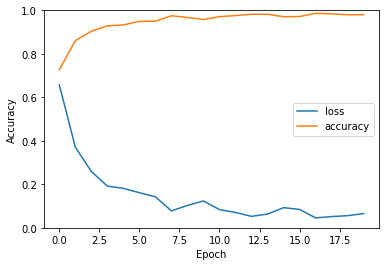

In [ ]:
#do thi train
import matplotlib.pyplot as plt

plt.plot(np.arange(0, EPOCHS), H.history['loss'], label='loss')
plt.plot(np.arange(0, EPOCHS), H.history['accuracy'], label = 'accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

**9) Lưu model**

In [ ]:
#save model
model.save('XLA_DenseNet121.h5')